# Final Project: Heart Disease Detection

#### Project Description:

In this project, I analyze the "heart" dataset to predict the presence of heart disease in potential patients using machine learning models. The dataset consists of 303 instances, initially containing 13 features as well as the target variable that indicates the presence or absence of heart disease.

#### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mstats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold


# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#### Load data

In [2]:
df = pd.read_csv('heart.csv')

#### Description of features

# Data Preprocessing & EDA

#### Data Description

In [3]:
# View the first few rows of the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Summarize the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# Determine the dimensions of the dataset
df.shape

(303, 14)

In [6]:
# Generate descriptive statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Identify missing values

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Understanding the distrubution of the target variable

In [8]:
# Count the occurrences of each unique value in the 'target' column
target_counts = df['target'].value_counts()

print("Label counts:")
target_counts

Label counts:


1    165
0    138
Name: target, dtype: int64

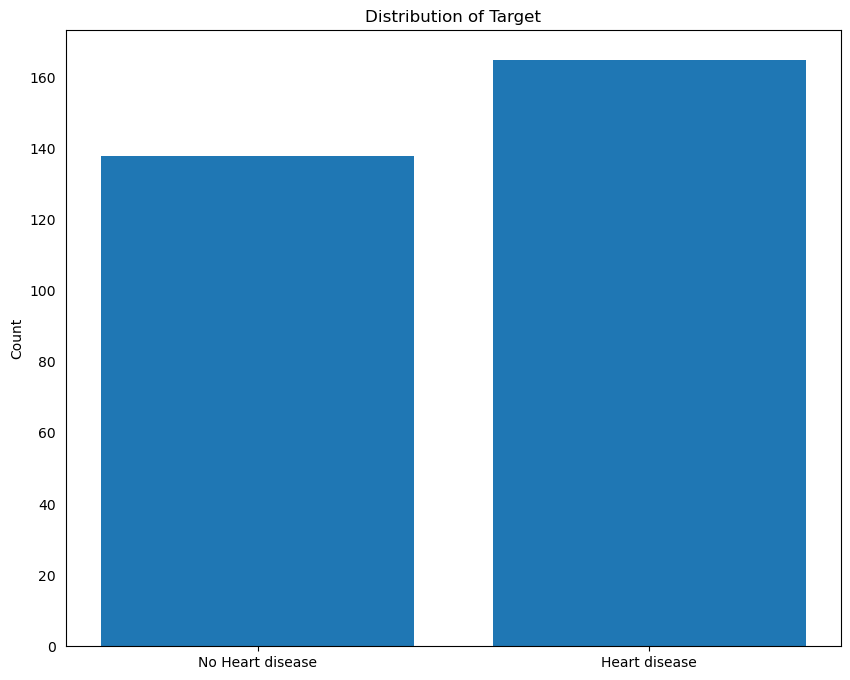

In [9]:
# Count the occurrences of each target value
target_counts = df['target'].value_counts()

# Plotting the distribution
plt.bar(target_counts.index, target_counts.values)
plt.ylabel('Count')
plt.title('Distribution of Target')

# Customize the x-axis tick labels
plt.xticks(target_counts.index, ['Heart disease', 'No Heart disease'])

# Remove the tick marks on the y-axis
plt.tick_params(axis='y', which='both', left=False, right=False)

plt.show()

- Bootstrapping may be neccesary

#### Numerical features

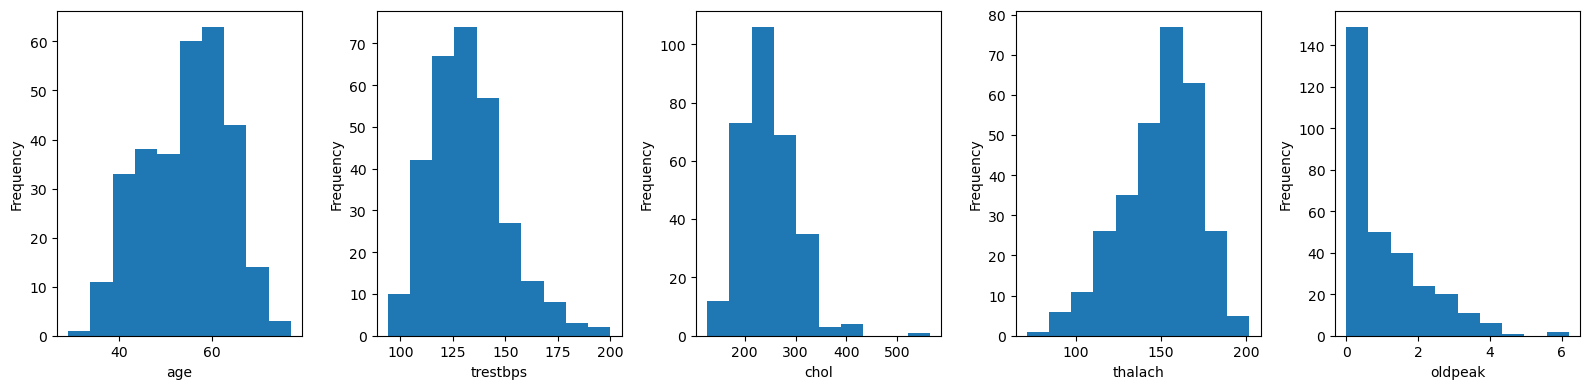

In [10]:
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

fig, axes = plt.subplots(nrows=1, ncols=len(numerical_features), figsize=(16, 4))

for i, feature in enumerate(numerical_features):
    ax = axes[i]
    ax.hist(df[feature], bins=10)
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Outliers are observed in chol and oldpeak

### Outlier Handling

#### chol

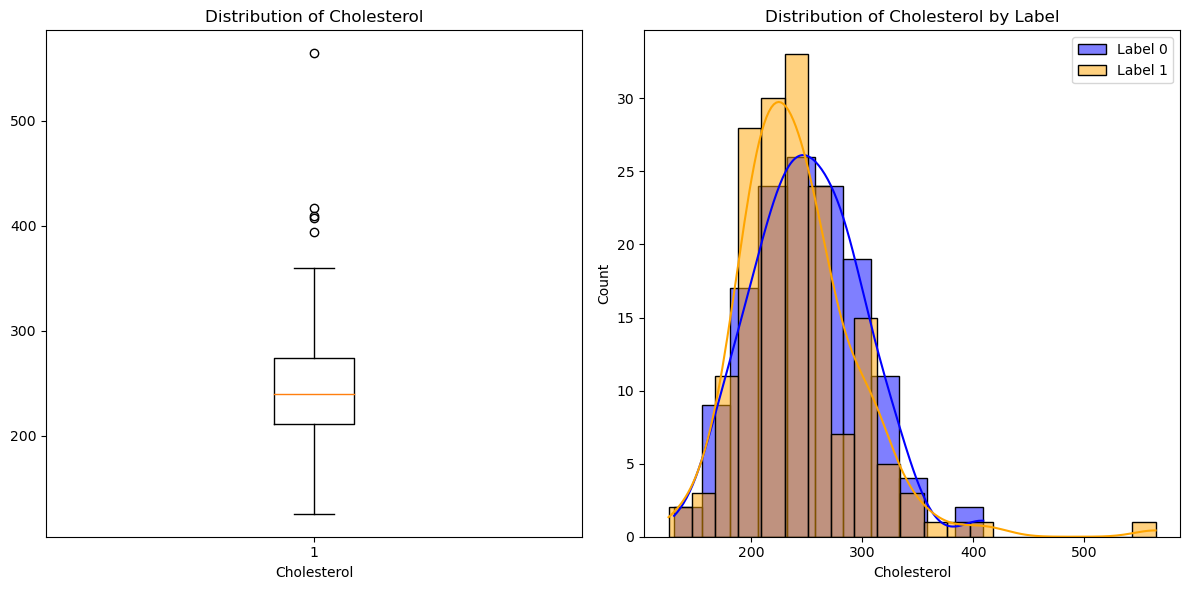

In [11]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot of 'chol'
axes[0].boxplot(df['chol'])
axes[0].set_xlabel('Cholesterol')
axes[0].set_title('Distribution of Cholesterol')

# Create separate data subsets for instances labeled as 0 and 1
df_label_0 = df[df['target'] == 0]
df_label_1 = df[df['target'] == 1]

# Histograms of 'chol' by label
sns.histplot(df_label_0['chol'], color='blue', label='Label 0', kde=True, ax=axes[1])
sns.histplot(df_label_1['chol'], color='orange', label='Label 1', kde=True, ax=axes[1])
axes[1].set_xlabel('Cholesterol')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of Cholesterol by Label')
axes[1].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()



Replace values that lay beyond the 99th percentile

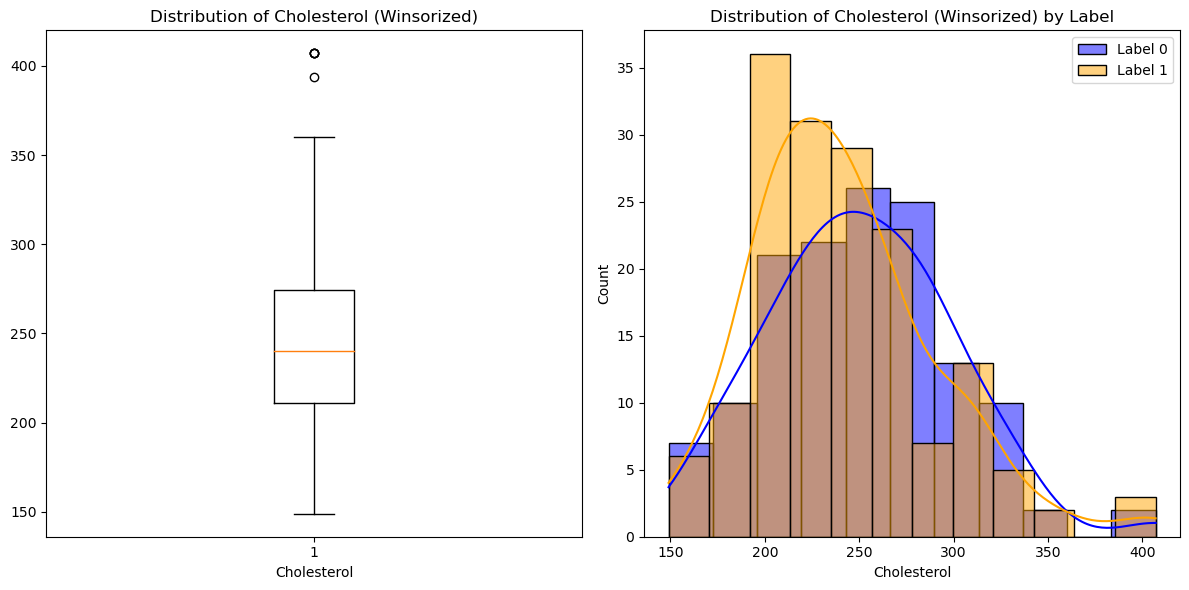

In [12]:
# Winsorize the 'chol' variable
df['chol_winsorized'] = mstats.winsorize(df['chol'], limits=[0.01, 0.01])


# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot of winsorized 'chol'
axes[0].boxplot(df['chol_winsorized'])
axes[0].set_xlabel('Cholesterol')
axes[0].set_title('Distribution of Cholesterol (Winsorized)')

# Create separate data subsets for instances labeled as 0 and 1
df_label_0 = df[df['target'] == 0]
df_label_1 = df[df['target'] == 1]

# Histograms of winsorized 'chol' by label
sns.histplot(df_label_0['chol_winsorized'], color='blue', label='Label 0', kde=True, ax=axes[1])
sns.histplot(df_label_1['chol_winsorized'], color='orange', label='Label 1', kde=True, ax=axes[1])
axes[1].set_xlabel('Cholesterol')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of Cholesterol (Winsorized) by Label')
axes[1].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

#### oldpeak

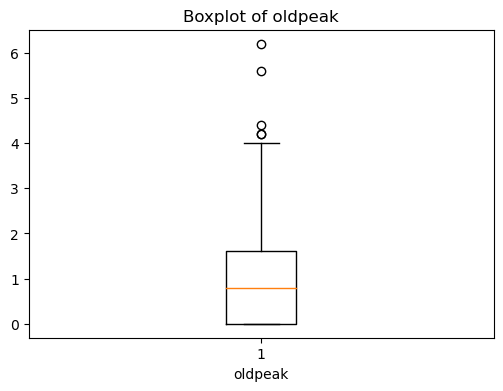

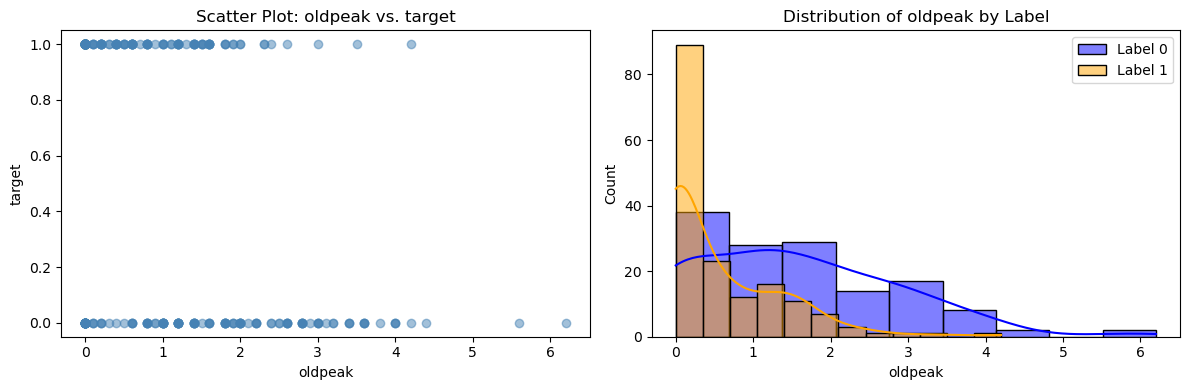

In [13]:
plt.figure(figsize=(6, 4))


plt.boxplot(df['oldpeak'])
plt.xlabel('oldpeak')
plt.title('Boxplot of oldpeak')
plt.show()

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Scatter plot: oldpeak vs. target
axes[0].scatter(df['oldpeak'], df['target'], color='steelblue', alpha=0.5)
axes[0].set_xlabel('oldpeak')
axes[0].set_ylabel('target')
axes[0].set_title('Scatter Plot: oldpeak vs. target')

# Create separate data subsets for instances labeled as 0 and 1
df_label_0 = df[df['target'] == 0]
df_label_1 = df[df['target'] == 1]

# Histograms of oldpeak by label
sns.histplot(df_label_0['oldpeak'], color='blue', label='Label 0', kde=True, ax=axes[1])
sns.histplot(df_label_1['oldpeak'], color='orange', label='Label 1', kde=True, ax=axes[1])
axes[1].set_xlabel('oldpeak')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of oldpeak by Label')
axes[1].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


Outliers were not replaced here. Because of the small amount of data, I decided to take a cautious approach to dealing with outliers. 

#### Numerical features' pearson correlation to the target variable

<AxesSubplot:>

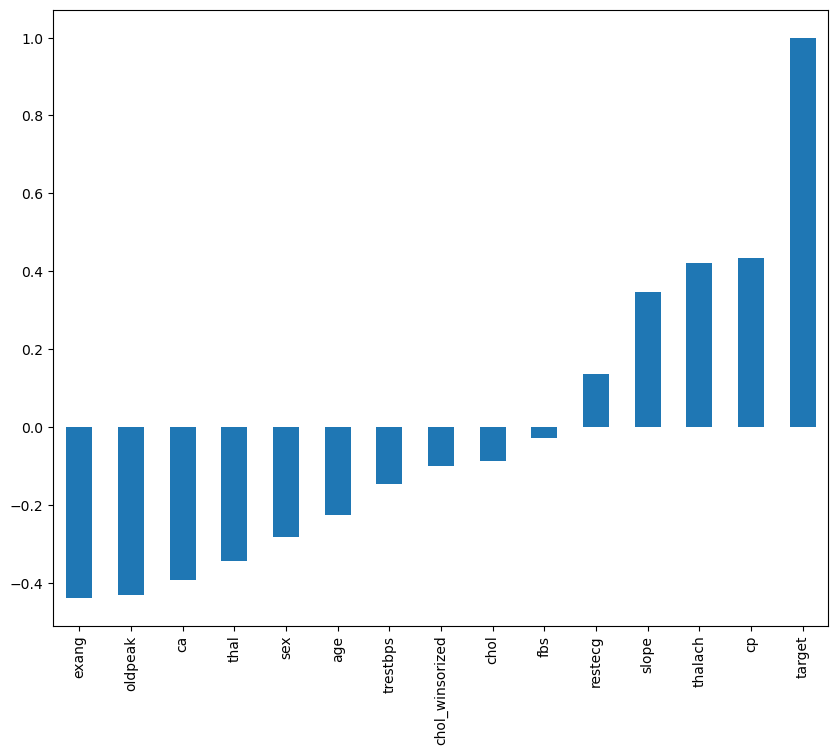

In [14]:
df.corr()['target'].sort_values().plot.bar()

Data shows linear relationship to the target variable. LR and SVM might be a good choice.

#### Checking for feature redundancy

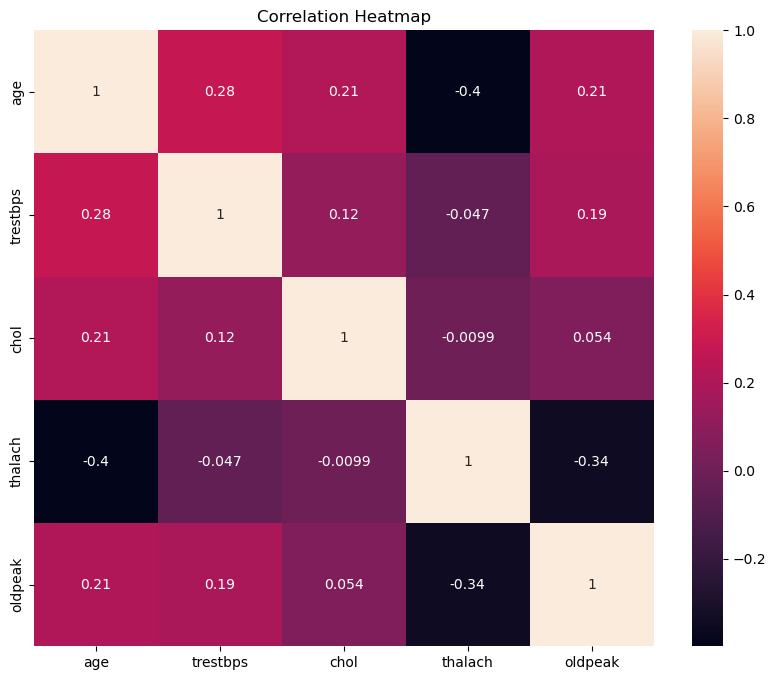

In [15]:
correlation_matrix = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

No redundancy between features

### Understanding categorical features

#### 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'

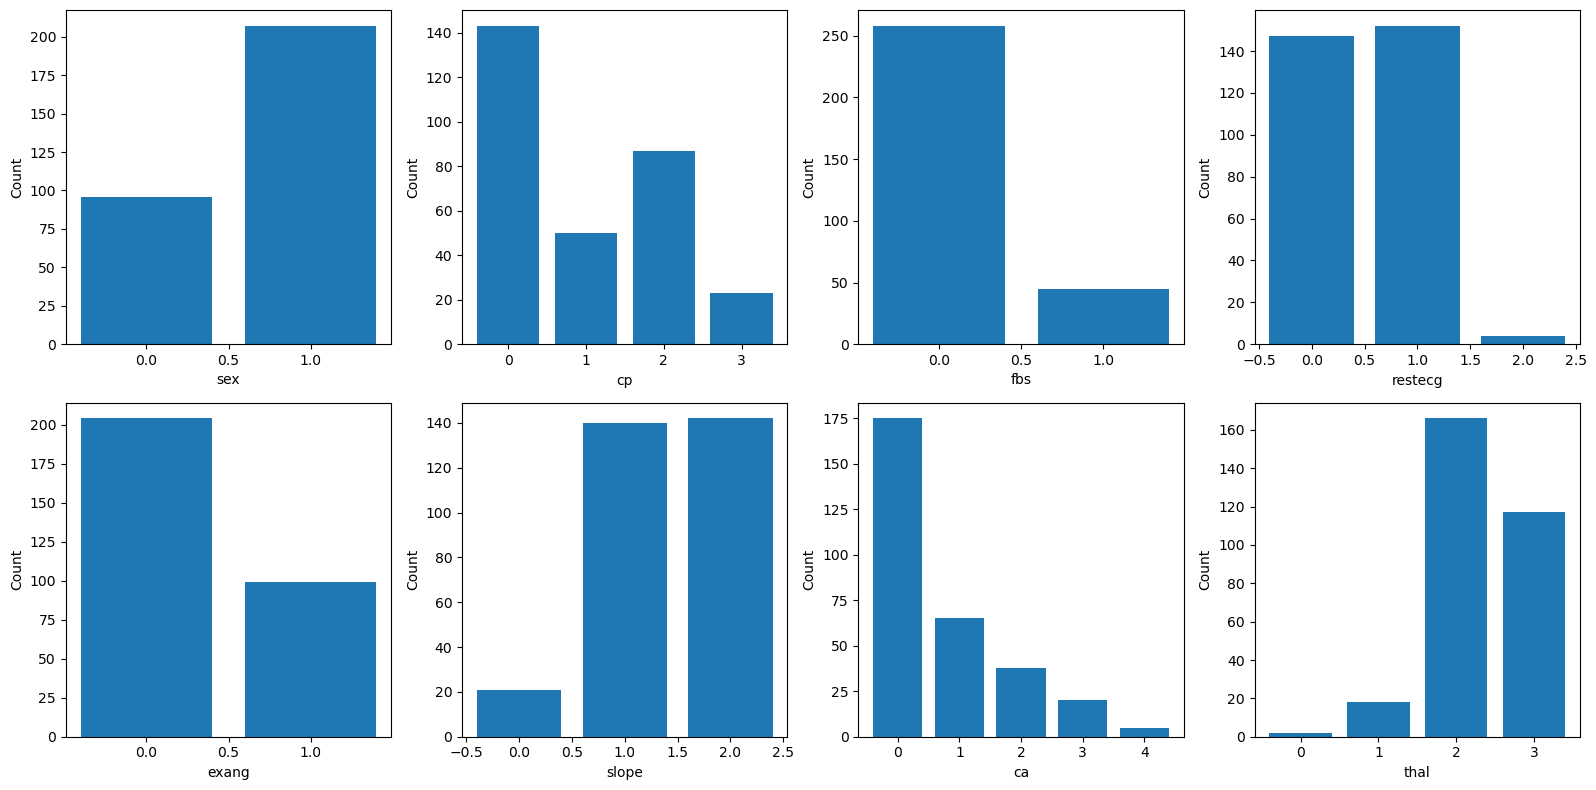

In [16]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    ax = axes[i]
    feature_counts = df[feature].value_counts()
    ax.bar(feature_counts.index, feature_counts.values)
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

#### cp

In [17]:
# counts
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

#### restecg

In [18]:
# counts
df['restecg'].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

Only four instances with the value "2". 

In [19]:
# Distribution of target variable
df.groupby('restecg').mean()['target']

restecg
0    0.462585
1    0.631579
2    0.250000
Name: target, dtype: float64

Even though values 0 and 2 have more similar labels, I decided to bin 1 and 2 because they are more similar in meaning.
The new binary feature indicates whether ECG is normal.

#### Binning restecg

In [20]:
# Change all 2s to 1s in the 'restecg' column
df['restecg'] = df['restecg'].replace(2, 1)

# Rename the column to 'normal_ecg'
df.rename(columns={'restecg': 'abnormal_restecg'}, inplace=True)

df['abnormal_restecg'].value_counts()

1    156
0    147
Name: abnormal_restecg, dtype: int64

#### thal

In [21]:
df['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

Only 2 instances with value "0".

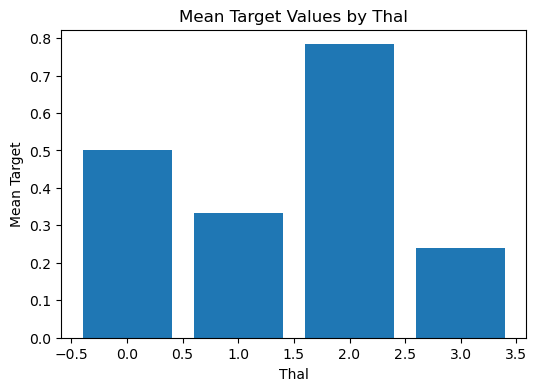

In [22]:
# Display the distribution of target variable
plt.figure(figsize=(6, 4))


thal_mean = df.groupby('thal').mean()['target']
plt.bar(thal_mean.index, thal_mean.values)
plt.title('Mean Target Values by Thal')
plt.xlabel('Thal')
plt.ylabel('Mean Target')
plt.show()


Binned 0 with 2. It was discoved that 0 was was NULL, so there was no context for binning. I decided to bin it with 1 because it had the most similar distribution of the target variable.

#### Binning thal

In [23]:
# Change all 0s to 1s in the 'thal' column
df['thal'] = df['thal'].replace(0, 1)
df['thal'].value_counts()

2    166
3    117
1     20
Name: thal, dtype: int64

#### ca

In [24]:
df['ca'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

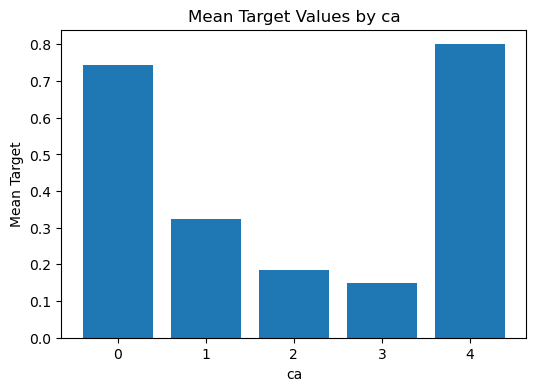

In [25]:
# Display the distribution of target variable
plt.figure(figsize=(6, 4))


thal_mean = df.groupby('ca').mean()['target']
plt.bar(thal_mean.index, thal_mean.values)
plt.title('Mean Target Values by ca')
plt.xlabel('ca')
plt.ylabel('Mean Target')
plt.show()


#### slope

In [26]:
df['slope'].value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

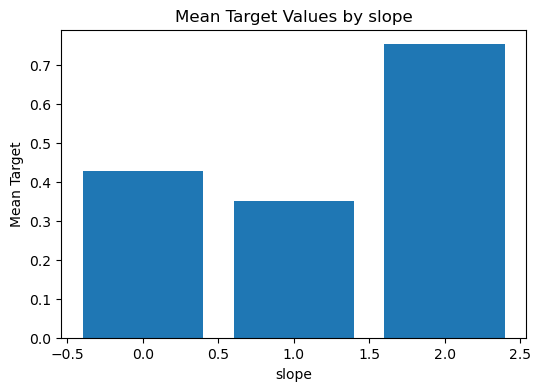

In [27]:
# Display the distribution of target variable
plt.figure(figsize=(6, 4))


thal_mean = df.groupby('slope').mean()['target']
plt.bar(thal_mean.index, thal_mean.values)
plt.title('Mean Target Values by slope')
plt.xlabel('slope')
plt.ylabel('Mean Target')
plt.show()


No changes were made to "ca" or "slope"

#### Create a separate df with dummy variables (for Logistic Regression / SVM)

In [28]:
# Create dummy variables for the specified columns
dummy_cols = ['cp', 'thal']
dummy_df = pd.get_dummies(df, columns=dummy_cols, drop_first=True)

# Print the new dataset with dummy variables
dummy_df.head()

,age,sex,trestbps,chol,fbs,abnormal_restecg,thalach,exang,oldpeak,slope,ca,target,chol_winsorized,cp_1,cp_2,cp_3,thal_2,thal_3
0,63,1,145,233,1,0,150,0,2.3,0,0,1,233,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,0,1,250,0,1,0,1,0
2,41,0,130,204,0,0,172,0,1.4,2,0,1,204,1,0,0,1,0
3,56,1,120,236,0,1,178,0,0.8,2,0,1,236,1,0,0,1,0
4,57,0,120,354,0,1,163,1,0.6,2,0,1,354,0,0,0,1,0


Explainability: if all cps are false, then cp is type 0. If all thals are false, then thal is 1.

#### Pearson correlations of features to target (with dummies)

<AxesSubplot:>

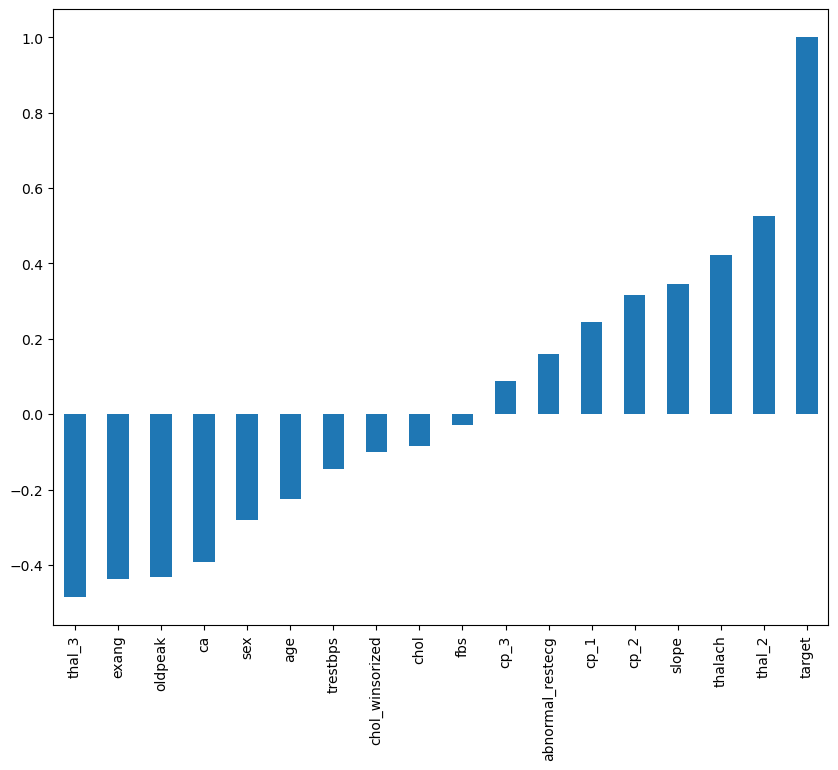

In [29]:
dummy_df.corr()['target'].sort_values().plot.bar()

# Train-Test Split

Both the regular dataset and dataset with dummies are shuffled and split in the same way. This is done in order to compare results and ensemble different models later on.

Split df into 80% train, 20% test

In [30]:
# Split the shuffled data into features (X) and target (y)
X = df.drop('target', axis=1)  # Features
y = df['target']  # Target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

# Verify the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (242, 14)
X_test shape: (61, 14)
y_train shape: (242,)
y_test shape: (61,)


Split dummy_df into 80% train, 20% test

In [31]:
# Split the shuffled data into features (X) and target (y)
X_d = dummy_df.drop('target', axis=1)  # Features
y_d = dummy_df['target']  # Target

# Split the data into train and test sets
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.2, random_state=42,shuffle=True)

# Verify the shapes of the resulting sets
print("X_train shape:", X_train_d.shape)
print("X_test shape:", X_test_d.shape)
print("y_train shape:", y_train_d.shape)
print("y_test shape:", y_test_d.shape)

X_train shape: (242, 17)
X_test shape: (61, 17)
y_train shape: (242,)
y_test shape: (61,)


Make sure both sets are shuffled the same way

In [32]:
print(X_train.index.equals(X_train_d.index))
print(X_test.index.equals(X_test_d.index))
print(y_train.index.equals(y_train_d.index))
print(y_test.index.equals(y_test_d.index))


True
True
True
True


#### Checking the distrubution of the target variable is similar in both the train and testing sets

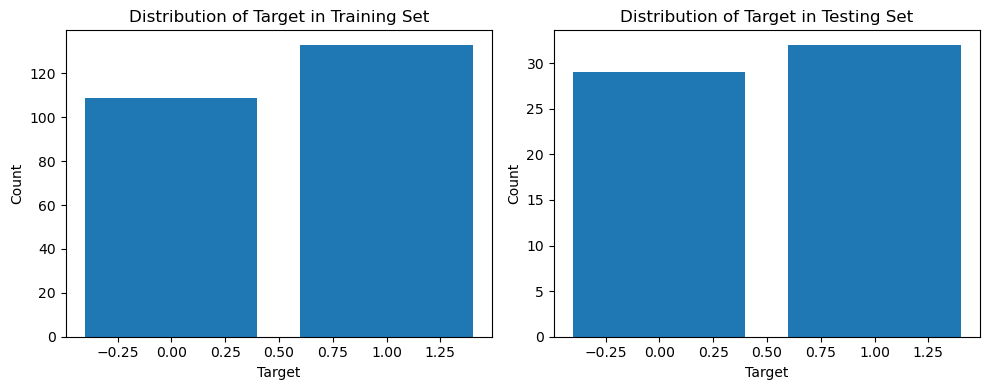

In [33]:
# Get the value counts of the target variable in the training set
train_value_counts = y_train.value_counts()

# Get the value counts of the target variable in the testing set
test_value_counts = y_test.value_counts()

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot the distribution of the target variable in the training set
axes[0].bar(train_value_counts.index, train_value_counts.values)
axes[0].set_xlabel('Target')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Target in Training Set')

# Plot the distribution of the target variable in the testing set
axes[1].bar(test_value_counts.index, test_value_counts.values)
axes[1].set_xlabel('Target')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of Target in Testing Set')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


Looks good

#### Number of instances and features in each split

In [34]:
print("Number of instances in training sets:",len(X_train))
print("Number of instances in testing sets:",len(X_test))

Number of instances in training sets: 242
Number of instances in testing sets: 61


In [35]:
print("Number of features in df training set:",len(X_train.columns))
print("Number of features in dummies_df training set:",len(X_train_d.columns))


Number of features in df training set: 14
Number of features in dummies_df training set: 17


# Benchmark

In [36]:
# Create a vector of all ones with the same length as X_train
y_pred = [1] * len(X_train_d)

# Compute evaluation metrics
accuracy = accuracy_score(y_train_d, y_pred)
precision = precision_score(y_train_d, y_pred)
recall = recall_score(y_train_d, y_pred)
f1 = f1_score(y_train_d, y_pred)
auc = roc_auc_score(y_train_d, y_pred)

# Print the results
print("Results for Benchmark (All instances classified as positive):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC Score: {auc:.4f}")


Results for Benchmark (All instances classified as positive):
Accuracy: 0.5496
Precision: 0.5496
Recall: 1.0000
F1 Score: 0.7093
AUC Score: 0.5000


# Modeling

## Logistic Regression

LR was chosen because of features' high pearson correlations to the target variable.

#### Normalization Selection

In [37]:
# Define the normalization techniques to test
normalizers = {
    "No normalization": None,
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler(),
    "RobustScaler": RobustScaler()
}

# Perform k-fold cross-validation with different normalizers
k = 5  # Number of folds

for normalizer_name, normalizer in normalizers.items():
    print(f"{normalizer_name}")
    logreg = LogisticRegression(solver='liblinear')
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    auc_scores = []  # Store AUC scores
    
    # Iterate over the folds
    for train_index, val_index in StratifiedKFold(n_splits=k).split(X_train_d, y_train_d):
        X_train_fold, X_val_fold = X_train_d.iloc[train_index], X_train_d.iloc[val_index]
        y_train_fold, y_val_fold = y_train_d.iloc[train_index], y_train_d.iloc[val_index]
        
        # Apply normalization if specified
        if normalizer:
            X_train_fold = normalizer.fit_transform(X_train_fold)
            X_val_fold = normalizer.transform(X_val_fold)
        
        # Fit the logistic regression model and evaluate on the validation set
        logreg.fit(X_train_fold, y_train_fold)
        y_pred = logreg.predict(X_val_fold)
        
        # Compute accuracy, precision, recall, F1 score, and AUC
        accuracy = accuracy_score(y_val_fold, y_pred)
        precision = precision_score(y_val_fold, y_pred)
        recall = recall_score(y_val_fold, y_pred)
        f1 = f1_score(y_val_fold, y_pred)
        auc = roc_auc_score(y_val_fold, y_pred)
        
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
        auc_scores.append(auc)
    
    # Compute and print the average of each metric
    avg_accuracy = sum(accuracies) / k
    avg_precision = sum(precisions) / k
    avg_recall = sum(recalls) / k
    avg_f1_score = sum(f1_scores) / k
    avg_auc_score = sum(auc_scores) / k
    
    print(f"Average Accuracy: {avg_accuracy:.4f}")
    print(f"Average Precision: {avg_precision:.4f}")
    print(f"Average Recall: {avg_recall:.4f}")
    print(f"Average F1 Score: {avg_f1_score:.4f}")
    print(f"Average AUC Score: {avg_auc_score:.4f}")
    print()


No normalization
Average Accuracy: 0.8100
Average Precision: 0.8099
Average Recall: 0.8570
Average F1 Score: 0.8321
Average AUC Score: 0.8042

MinMaxScaler
Average Accuracy: 0.8264
Average Precision: 0.8383
Average Recall: 0.8570
Average F1 Score: 0.8450
Average AUC Score: 0.8224

StandardScaler
Average Accuracy: 0.8140
Average Precision: 0.8171
Average Recall: 0.8573
Average F1 Score: 0.8352
Average AUC Score: 0.8087

RobustScaler
Average Accuracy: 0.8183
Average Precision: 0.8228
Average Recall: 0.8573
Average F1 Score: 0.8382
Average AUC Score: 0.8135



Because the goal is to identify heart disease, I  chose to emphasize punishing false-negetives (**recall**). A pitfall of this is that the model might try to classify too many instances as positive in order to "catch 'em all". Therefore, the secondary metric for evaluation is **F1 score**. I chose **MinMax Scalar** as the normalizer because it produced the best F1 and its recall was second to Standard Scalar by 0.0003.

# Hyperparameter Optimization

### Optimizing recall:

In [38]:
# Define the hyperparameters to search over
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 0.2, 0.25, 0.35, 0.45, 0.5, 0.65, 0.75, 0.85, 1, 2.5, 5, 7.5, 10, 100, 1000],  # Inverse of regularization strength
    'logisticregression__penalty': ['l1', 'l2', 'elasticnet'],  # Regularization type
    'logisticregression__fit_intercept': [True, False],  # Whether to fit an intercept term
    'logisticregression__class_weight': [None, 'balanced']  # Weights associated with classes
}

# Create the pipeline with scaling and logistic regression
pipeline = make_pipeline(MinMaxScaler(), LogisticRegression(solver='liblinear'))

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_d, y_train_d)

# Print the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Get the best estimator
best_estimator = grid_search.best_estimator_

# Define the scoring metrics
scoring_metrics = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc']

# Perform cross-validation and get the scores
cv_results = cross_validate(best_estimator, X_train_d, y_train_d, cv=5, scoring=scoring_metrics)

# Print the evaluation metrics
print("Evaluation Metrics:")
print("Accuracy:", cv_results['test_accuracy'].mean())
print("F1 Score:", cv_results['test_f1'].mean())
print("Recall:", cv_results['test_recall'].mean())
print("Precision:", cv_results['test_precision'].mean())
print("AUC:", cv_results['test_roc_auc'].mean())


Best Hyperparameters:
{'logisticregression__C': 0.001, 'logisticregression__class_weight': None, 'logisticregression__fit_intercept': True, 'logisticregression__penalty': 'l2'}
Evaluation Metrics:
Accuracy: 0.7150510204081633
F1 Score: 0.7883396727243069
Recall: 0.9626780626780626
Precision: 0.6680325814536341
AUC: 0.8744465411132077


Optimizing recall causes the model to get "greedy" with positive predictions. F1 score will be the primary metric for evaluation moving forward.
#### Optimizing F1

In [39]:


# Define the hyperparameters to search over
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 0.2, 0.25, 0.35, 0.45, 0.5, 0.65, 0.75, 0.85, 1, 2.5, 5, 7.5, 10, 100, 1000],  # Inverse of regularization strength
    'logisticregression__penalty': ['l1', 'l2', 'elasticnet'],  # Regularization type
    'logisticregression__fit_intercept': [True, False],  # Whether to fit an intercept term
    'logisticregression__class_weight': [None, 'balanced'],  # Weights associated with classes
    'logisticregression__max_iter': [100, 200, 500],  # Maximum number of iterations
    'logisticregression__dual': [False],  # Whether to use the dual formulation
    'logisticregression__tol': [1e-3, 1e-4, 1e-5],  # Tolerance for stopping criteria
    'logisticregression__intercept_scaling': [1.0, 2.0, 3.0]  # Scaling factor for intercept
}

# Create the pipeline with scaling and logistic regression
pipeline = make_pipeline(MinMaxScaler(), LogisticRegression(solver='liblinear'))

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_d, y_train_d)

# Print the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Get the best estimator
best_estimator = grid_search.best_estimator_

# Define the scoring metrics
scoring_metrics = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc']

# Perform cross-validation and get the scores
cv_results = cross_validate(best_estimator, X_train_d, y_train_d, cv=5, scoring=scoring_metrics)

# Print the evaluation metrics
print("Evaluation Metrics:")
print("Accuracy:", cv_results['test_accuracy'].mean())
print("F1 Score:", cv_results['test_f1'].mean())
print("Recall:", cv_results['test_recall'].mean())
print("Precision:", cv_results['test_precision'].mean())
print("AUC:", cv_results['test_roc_auc'].mean())

new_params = {}
for key, value in grid_search.best_params_.items():
    new_key = key.replace('logisticregression__', '')
    new_params[new_key] = value

print(new_params)


Best Hyperparameters:
{'logisticregression__C': 0.65, 'logisticregression__class_weight': None, 'logisticregression__dual': False, 'logisticregression__fit_intercept': True, 'logisticregression__intercept_scaling': 1.0, 'logisticregression__max_iter': 100, 'logisticregression__penalty': 'l2', 'logisticregression__tol': 0.001}
Evaluation Metrics:
Accuracy: 0.8264455782312925
F1 Score: 0.844950100256062
Recall: 0.856980056980057
Precision: 0.838341873180583
AUC: 0.8812742812742813
{'C': 0.65, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1.0, 'max_iter': 100, 'penalty': 'l2', 'tol': 0.001}


## Feature Selection
Forward Selection (with no stopping criteria)


In [40]:
# Initialize an empty list to store selected feature indices and names
selected_features_indices = []
selected_features_names = []

# Perform forward selection
feature_scores = []
best_f1_score = -np.inf
best_selected_features = None

for i in range(X_train_d.shape[1]):
    best_metric = -np.inf
    best_feature_idx = None
    
    # Iterate over the remaining features
    for j in range(X_train_d.shape[1]):
        if j not in selected_features_indices:
            # Add the j-th feature to the selected features
            selected_features_indices.append(j)
            selected_features_names.append(X_train_d.columns[j])
            
            # Select the features based on the selected indices
            X_train_selected = X_train_d.iloc[:, selected_features_indices]
            
            # Apply feature scaling after each fold split
            pipeline = make_pipeline(MinMaxScaler(), LogisticRegression(solver='liblinear'))
            
            # Perform cross-validation on the selected features
            cv_results = cross_validate(pipeline, X_train_selected, y_train_d, cv=5, scoring=scoring_metrics)
            
            # Get the average evaluation metrics
            avg_f1 = cv_results['test_f1'].mean()
            avg_accuracy = cv_results['test_accuracy'].mean()
            avg_recall = cv_results['test_recall'].mean()
            avg_precision = cv_results['test_precision'].mean()
            avg_auc = cv_results['test_roc_auc'].mean()
            
            # If the current metric is better than the best metric so far, update the best metric and feature index
            if avg_f1 > best_metric:
                best_metric = avg_f1
                best_feature_idx = j
            
            # Remove the j-th feature from the selected features for the next iteration
            selected_features_indices.remove(j)
            selected_features_names.remove(X_train_d.columns[j])
    
    # If a feature was selected in this iteration, add it to the selected features list
    if best_feature_idx is not None:
        selected_features_indices.append(best_feature_idx)
        selected_features_names.append(X_train_d.columns[best_feature_idx])
        
        # Select the features based on the selected indices
        X_train_selected = X_train_d.iloc[:, selected_features_indices]
        
        # Apply feature scaling after each fold split
        pipeline = make_pipeline(MinMaxScaler(), LogisticRegression(solver='liblinear'))
        
        # Perform cross-validation on the selected features
        cv_results = cross_validate(pipeline, X_train_selected, y_train_d, cv=5, scoring=scoring_metrics)
        
        # Get the average evaluation metrics
        avg_f1 = cv_results['test_f1'].mean()
        avg_accuracy = cv_results['test_accuracy'].mean()
        avg_recall = cv_results['test_recall'].mean()
        avg_precision = cv_results['test_precision'].mean()
        avg_auc = cv_results['test_roc_auc'].mean()
        
        # Store the evaluation metrics and selected features for each iteration
        feature_scores.append({
            'Accuracy': avg_accuracy,
            'Recall': avg_recall,
            'Precision': avg_precision,
            'F1 Score': avg_f1,
            'AUC': avg_auc,
            'Selected Features': selected_features_names.copy()
        })
        
        # Check if the current iteration has the best F1 score
        if avg_f1 > best_f1_score:
            best_f1_score = avg_f1
            best_selected_features = selected_features_names.copy()

# Print the selected features and evaluation metrics for each iteration
print("Forward Selection:")
for i, scores in enumerate(feature_scores):
    print(f"Iteration {i+1}:")
    print("Evaluation Metrics:")
    print(scores)
    print()

# Print the selected features with the best F1 score
print("Features with the Best F1 Score:")
print(best_selected_features)


Forward Selection:
Iteration 1:
Evaluation Metrics:
{'Accuracy': 0.7562074829931973, 'Recall': 0.7971509971509971, 'Precision': 0.7696296296296297, 'F1 Score': 0.7827409913139218, 'AUC': 0.7513893513893514, 'Selected Features': ['thal_2']}

Iteration 2:
Evaluation Metrics:
{'Accuracy': 0.7603741496598639, 'Recall': 0.8048433048433049, 'Precision': 0.7709523809523808, 'F1 Score': 0.7870736258352358, 'AUC': 0.8231475314808648, 'Selected Features': ['thal_2', 'thalach']}

Iteration 3:
Evaluation Metrics:
{'Accuracy': 0.7728741496598639, 'Recall': 0.8048433048433049, 'Precision': 0.788994708994709, 'F1 Score': 0.7961190187208063, 'AUC': 0.8395129561796228, 'Selected Features': ['thal_2', 'thalach', 'oldpeak']}

Iteration 4:
Evaluation Metrics:
{'Accuracy': 0.8017006802721088, 'Recall': 0.8575498575498577, 'Precision': 0.7972200830932756, 'F1 Score': 0.8254684013304703, 'AUC': 0.8552672636005969, 'Selected Features': ['thal_2', 'thalach', 'oldpeak', 'cp_2']}

Iteration 5:
Evaluation Metrics

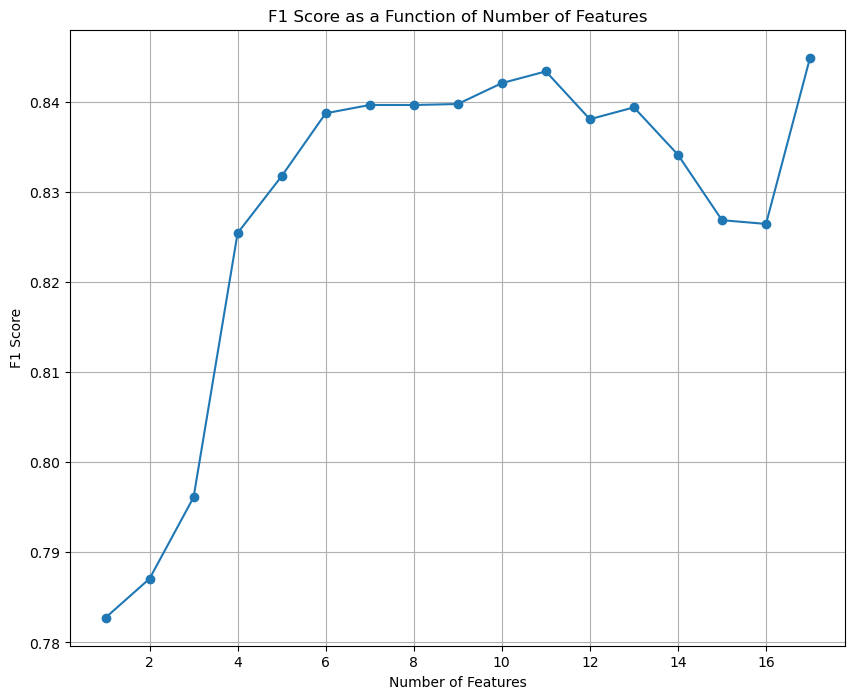

In [41]:
# Extract the F1 scores and number of features from the feature_scores
f1_scores = [scores['F1 Score'] for scores in feature_scores]
num_features = range(1, len(f1_scores) + 1)

# Plot the F1 score as a function of the number of features
plt.plot(num_features, f1_scores, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('F1 Score')
plt.title('F1 Score as a Function of Number of Features')
plt.grid(True)
plt.show()

All 17 features produce the best F1 score. 

## Algorithm Intropspection:

#### Retrieve feature importance
We can trust the weights because each feature was normalized-- the best_estimator variable is a pipeline of MinMaxScalar and LogisticRegression.

Feature Weights:
chol: -0.1229093511378083
fbs: 0.22851238968733456
age: -0.3647621448355951
chol_winsorized: -0.3827039030275689
abnormal_restecg: 0.4159934221563407
trestbps: -0.5146345240696387
cp_1: 0.6540227310657132
thal_2: 0.660036512970563
thal_3: -0.7012676494563264
sex: -0.845890678906974
cp_3: 0.847586731295064
thalach: 0.8639674800135226
exang: -0.9784799986068115
slope: 0.9960860803337096
cp_2: 1.1197167442813103
oldpeak: -1.1744420993366576
ca: -1.693872442805481


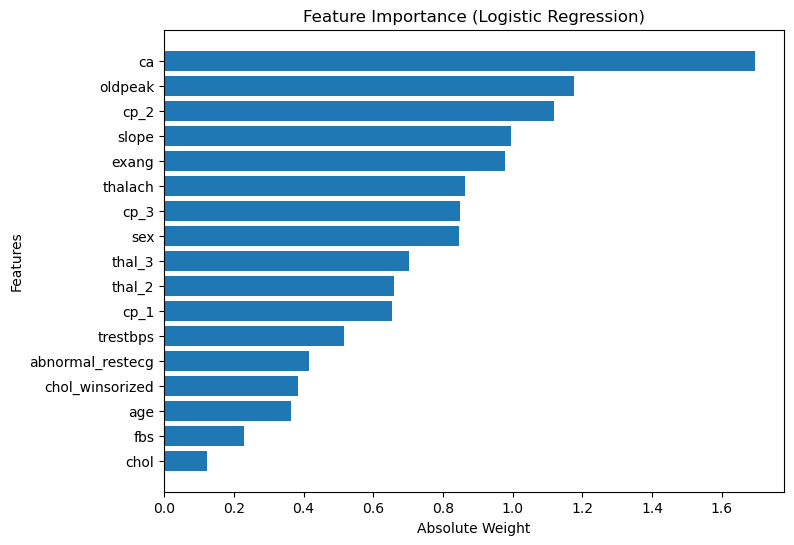

In [42]:
# Retrieve feature names
feature_names = X_train_d.columns

# Retrieve feature weights (coefficients)
feature_weights = best_estimator.named_steps['logisticregression'].coef_[0]

# Sort feature names based on feature weights
sorted_indices = np.argsort(np.abs(feature_weights))
sorted_feature_names = feature_names[sorted_indices]
sorted_feature_weights = feature_weights[sorted_indices]

# Print feature weights with names
print("Feature Weights:")
for feature_name, weight in zip(sorted_feature_names, sorted_feature_weights):
    print(f"{feature_name}: {weight}")

# Create a bar plot of feature importance
plt.figure(figsize=(8, 6))
plt.barh(sorted_feature_names, np.abs(sorted_feature_weights))
plt.xlabel('Absolute Weight')
plt.ylabel('Features')
plt.title('Feature Importance (Logistic Regression)')
plt.show()

Number of major vessels (ca) is by far the most important feature.

#### Best alpha (eta)

In [43]:
print(new_params["C"])

0.65


#### Best Epsilon

In [44]:
print(new_params["tol"])

0.001


#### Best measurement for penalty

In [45]:
print(new_params["penalty"])

l2


#### Best maximum limit of iterations during convergence

In [46]:
print(new_params["max_iter"])

100


## Sanity check: comparing training and validation results

In [47]:
# Define the scoring metrics
scoring_metrics = ['accuracy', 'f1', 'recall', 'precision', 'roc_auc']



# Perform cross-validation and get the scores
cv_results = cross_validate(best_estimator, X_train_d, y_train_d, cv=5, scoring=scoring_metrics,return_train_score=True)

# Print the evaluation metrics for validation folds
print("\nTraining Fold Evaluation Metrics:")
print("Accuracy:", cv_results['train_accuracy'].mean())
print("F1 Score:", cv_results['train_f1'].mean())
print("Recall:", cv_results['train_recall'].mean())
print("Precision:", cv_results['train_precision'].mean())
print("AUC:", cv_results['train_roc_auc'].mean())


# Print the evaluation metrics for validation folds
print("\nValidation Fold Evaluation Metrics:")
print("Accuracy:", cv_results['test_accuracy'].mean())
print("F1 Score:", cv_results['test_f1'].mean())
print("Recall:", cv_results['test_recall'].mean())
print("Precision:", cv_results['test_precision'].mean())
print("AUC:", cv_results['test_roc_auc'].mean())



Training Fold Evaluation Metrics:
Accuracy: 0.8429838149671491
F1 Score: 0.8613511894677572
Recall: 0.8872332921883267
Precision: 0.8369676983292544
AUC: 0.9208410284445954

Validation Fold Evaluation Metrics:
Accuracy: 0.8264455782312925
F1 Score: 0.844950100256062
Recall: 0.856980056980057
Precision: 0.838341873180583
AUC: 0.8812742812742813


In [48]:
logistic_regression = best_estimator

# Building and Optimizing Classifiers for Ensemble
Optimization is done using k-folds cross validation on the training set.

## KNN

Standard scalar was used after testing normalizers manually

In [49]:
from sklearn.neighbors import KNeighborsClassifier


# Create a pipeline with StandardScaler and KNeighborsClassifier
pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier())

# Define scoring metrics
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'kneighborsclassifier__n_neighbors': range(0,25),
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__p': [1, 2]
}

# Perform grid search using cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
knn = grid_search.best_estimator_

# Perform cross-validation and get the scores with the best model
cv_results = cross_validate(knn, X_train, y_train, cv=5, scoring=scoring_metrics, return_train_score=True)

# Print the evaluation metrics for training folds
print("Training Fold Evaluation Metrics:")
print("Accuracy:", cv_results['train_accuracy'].mean())
print("Precision:", cv_results['train_precision'].mean())
print("Recall:", cv_results['train_recall'].mean())
print("F1 Score:", cv_results['train_f1'].mean())
print("AUC:", cv_results['train_roc_auc'].mean())

# Print the evaluation metrics for validation folds
print("\nValidation Metrics:")
print("Accuracy:", cv_results['test_accuracy'].mean())
print("Precision:", cv_results['test_precision'].mean())
print("Recall:", cv_results['test_recall'].mean())
print("F1 Score:", cv_results['test_f1'].mean())
print("AUC:", cv_results['test_roc_auc'].mean())


Training Fold Evaluation Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
AUC: 1.0

Validation Metrics:
Accuracy: 0.8429421768707483
Precision: 0.8124528998069044
Recall: 0.9321937321937324
F1 Score: 0.867791769241214
AUC: 0.9177785177785178


## Adaboost (decision tree)

#### Adaboost without optimization

In [50]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the base classifier
classifier = DecisionTreeClassifier()

# Create an instance of the AdaBoost classifier
adaboost = AdaBoostClassifier(base_estimator=classifier)

# Define the scoring metrics
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Perform cross-validation and get the scores
cv_results = cross_validate(adaboost, X_train, y_train, cv=5, scoring=scoring_metrics, return_train_score=True)

# Print the evaluation metrics for training folds
print("Training Fold Evaluation Metrics:")
print("Accuracy:", cv_results['train_accuracy'].mean())
print("Precision:", cv_results['train_precision'].mean())
print("Recall:", cv_results['train_recall'].mean())
print("F1 Score:", cv_results['train_f1'].mean())
print("AUC:", cv_results['train_roc_auc'].mean())

# Print the evaluation metrics for validation folds
print("\nValidation Metrics:")
print("Accuracy:", cv_results['test_accuracy'].mean())
print("Precision:", cv_results['test_precision'].mean())
print("Recall:", cv_results['test_recall'].mean())
print("F1 Score:", cv_results['test_f1'].mean())
print("AUC:", cv_results['test_roc_auc'].mean())


Training Fold Evaluation Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
AUC: 1.0

Validation Metrics:
Accuracy: 0.7726190476190475
Precision: 0.7931773689273689
Recall: 0.7960113960113959
F1 Score: 0.7919733831886054
AUC: 0.7692178192178192


#### Adaboost with optimization

In [51]:
# Step 2: Instantiate the AdaBoost classifier
adaboost = AdaBoostClassifier()

# Step 3: Define the hyperparameters you want to optimize
param_grid = {
    'n_estimators': [100, 200,300],
    'learning_rate': [0.005, 0.01, 0.1, 0.5, 1.0],
}

# Step 4: Perform k-fold cross-validation with hyperparameter optimization
k = 5  # Number of folds for cross-validation
cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

grid_search = GridSearchCV(adaboost, param_grid=param_grid, cv=cv, scoring='f1')

# Step 5: Fit the model to the training data
grid_search.fit(X_train, y_train)

# Step 6: Get the best hyperparameters and evaluate the model
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

adaboost = grid_search.best_estimator_

# Define the scoring metrics
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Step 8: Perform cross-validation and get the scores
cv_results = cross_validate(adaboost, X_train, y_train, cv=cv, scoring=scoring_metrics, return_train_score=True)

# Print the evaluation metrics for training folds
print("Training Fold Evaluation Metrics:")
print("Accuracy:", cv_results['train_accuracy'].mean())
print("Precision:", cv_results['train_precision'].mean())
print("Recall:", cv_results['train_recall'].mean())
print("F1 Score:", cv_results['train_f1'].mean())
print("AUC:", cv_results['train_roc_auc'].mean())

# Print the evaluation metrics for validation folds
print("\nValidation Metrics:")
print("Accuracy:", cv_results['test_accuracy'].mean())
print("Precision:", cv_results['test_precision'].mean())
print("Recall:", cv_results['test_recall'].mean())
print("F1 Score:", cv_results['test_f1'].mean())
print("AUC:", cv_results['test_roc_auc'].mean())

Best Hyperparameters: {'learning_rate': 0.01, 'n_estimators': 200}
Best Score: 0.8523573583101713
Training Fold Evaluation Metrics:
Accuracy: 0.8440094012072004
Precision: 0.8190896358543418
Recall: 0.9191676952918357
F1 Score: 0.866247674987763
AUC: 0.9276165658494232

Validation Metrics:
Accuracy: 0.83078231292517
Precision: 0.816433908045977
Recall: 0.8954415954415955
F1 Score: 0.8523573583101713
AUC: 0.9045106128439461


We can see significant improvement in every metric.

In [52]:
adaboost

AdaBoostClassifier(learning_rate=0.01, n_estimators=200)

## Naive Bayes

In [53]:
from sklearn.naive_bayes import GaussianNB


# Define the parameter grid for hyperparameter tuning
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],
              'priors': [None, [0.5, 0.5], [0.7, 0.3], [0.3, 0.7]]}


# Create a Gaussian Naive Bayes classifier
nb = GaussianNB()

# Perform grid search using k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(nb, param_grid, cv=kfold)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params_NB = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

# Create an instance of the Naive Bayes classifier
naive_bayes = GaussianNB(**best_params_NB)

# Define the scoring metrics
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Perform cross-validation and get the scores
cv_results = cross_validate(naive_bayes, X_train, y_train, cv=5, scoring=scoring_metrics, return_train_score=True)

# Print the evaluation metrics for training folds
print("\nTraining Fold Evaluation Metrics:")
print("Accuracy:", cv_results['train_accuracy'].mean())
print("Precision:", cv_results['train_precision'].mean())
print("Recall:", cv_results['train_recall'].mean())
print("F1 Score:", cv_results['train_f1'].mean())
print("AUC:", cv_results['train_roc_auc'].mean())

# Print the evaluation metrics for validation folds
print("\nValidation Metrics:")
print("Accuracy:", cv_results['test_accuracy'].mean())
print("Precision:", cv_results['test_precision'].mean())
print("Recall:", cv_results['test_recall'].mean())
print("F1 Score:", cv_results['test_f1'].mean())
print("AUC:", cv_results['test_roc_auc'].mean())


Best Hyperparameters:
learning_rate: 0.01
n_estimators: 200

Training Fold Evaluation Metrics:
Accuracy: 0.825420650606271
Precision: 0.8331553298644641
Recall: 0.8533415623346853
F1 Score: 0.8430536798595492
AUC: 0.9143985735046426

Validation Metrics:
Accuracy: 0.8055272108843538
Precision: 0.8256659368728336
Recall: 0.8193732193732194
F1 Score: 0.8214086897194555
AUC: 0.8775298775298775


Note: the best hyperparameters are the default ones.

## Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create an instance of the Random Forest classifier
random_forest = RandomForestClassifier()

# Define the scoring metrics
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Perform cross-validation and get the scores
cv_results = cross_validate(random_forest, X_train, y_train, cv=5, scoring=scoring_metrics, return_train_score=True)

# Print the evaluation metrics for training folds
print("Training Fold Evaluation Metrics:")
print("Accuracy:", cv_results['train_accuracy'].mean())
print("Precision:", cv_results['train_precision'].mean())
print("Recall:", cv_results['train_recall'].mean())
print("F1 Score:", cv_results['train_f1'].mean())
print("AUC:", cv_results['train_roc_auc'].mean())

# Print the evaluation metrics for validation folds
print("\nValidation Metrics:")
print("Accuracy:", cv_results['test_accuracy'].mean())
print("Precision:", cv_results['test_precision'].mean())
print("Recall:", cv_results['test_recall'].mean())
print("F1 Score:", cv_results['test_f1'].mean())
print("AUC:", cv_results['test_roc_auc'].mean())

Training Fold Evaluation Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
AUC: 1.0

Validation Metrics:
Accuracy: 0.8224489795918368
Precision: 0.8284840547743773
Recall: 0.8572649572649572
F1 Score: 0.8408430633440392
AUC: 0.9054541137874471


In [55]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)


# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform grid search using k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=kfold,scoring='f1')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params_rf = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:")
for param, value in best_params_rf.items():
    print(f"{param}: {value}")


Best Hyperparameters:
bootstrap: True
max_depth: None
min_samples_leaf: 2
min_samples_split: 5
n_estimators: 100


In [56]:
np.random.seed(42)

# Create an instance of the Random Forest classifier
random_forest = RandomForestClassifier(**best_params_rf)

# Define the scoring metrics
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Perform cross-validation and get the scores
cv_results = cross_validate(random_forest, X_train, y_train, cv=5, scoring=scoring_metrics, return_train_score=True)

# Print the evaluation metrics for training folds
print("Training Fold Evaluation Metrics:")
print("Accuracy:", cv_results['train_accuracy'].mean())
print("Precision:", cv_results['train_precision'].mean())
print("Recall:", cv_results['train_recall'].mean())
print("F1 Score:", cv_results['train_f1'].mean())
print("AUC:", cv_results['train_roc_auc'].mean())

# Print the evaluation metrics for validation folds
print("\nValidation Metrics:")
print("Accuracy:", cv_results['test_accuracy'].mean())
print("Precision:", cv_results['test_precision'].mean())
print("Recall:", cv_results['test_recall'].mean())
print("F1 Score:", cv_results['test_f1'].mean())
print("AUC:", cv_results['test_roc_auc'].mean())

Training Fold Evaluation Metrics:
Accuracy: 0.9783238074889162
Precision: 0.9724723424723425
Recall: 0.9887321460059955
F1 Score: 0.98048901363465
AUC: 0.9978234051887668

Validation Metrics:
Accuracy: 0.8016156462585033
Precision: 0.8072302440689537
Recall: 0.8418803418803419
F1 Score: 0.8234217769309048
AUC: 0.9025801359134691


Scores did not improve, original RF will be used

In [57]:
random_forest = RandomForestClassifier()

## Ensemble (by majority vote)

In [58]:
def evaluate_majority_vote_kfold(X_train, X_train_d, y_train, logistic_regression, *models, random_seed=24):
    """
    Performs k-fold cross-validation with majority voting on a combination of models.

    Parameters:
        X_train (pandas.DataFrame): The input training data.
        X_train_d (pandas.DataFrame): The transformed training data specific to logistic regression.
        y_train (pandas.Series): The target training labels.
        logistic_regression: The logistic regression model object.
        *models: Variable number of model objects or references to be used in majority voting.
        random_seed (int): Random seed for reproducibility. 

    Returns:
        float: The average F1 score on the validation data across all folds.


    """    
    
    kf = KFold(n_splits=5, shuffle=True, random_state=random_seed)

    accuracy_train_scores = []
    precision_train_scores = []
    recall_train_scores = []
    f1_train_scores = []
    auc_train_scores = []

    accuracy_val_scores = []
    precision_val_scores = []
    recall_val_scores = []
    f1_val_scores = []
    auc_val_scores = []

    X_train.reset_index(drop=True, inplace=True)
    X_train_d.reset_index(drop=True, inplace=True)
    y_train.reset_index(drop=True, inplace=True)

    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_train_d_fold = X_train.loc[train_index], X_train_d.loc[train_index]
        X_val_fold, X_val_d_fold = X_train.loc[val_index], X_train_d.loc[val_index]
        y_train_fold = y_train.loc[train_index]
        y_val_fold = y_train.loc[val_index]

        # Separate datasets for logistic regression and other models
        X_train_logistic = X_train_d_fold
        X_train_other = X_train_fold
        X_val_logistic = X_val_d_fold
        X_val_other = X_val_fold

        # Define scoring metrics
        scoring_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

        # List to store the predictions of each model
        all_predictions_train = []
        all_predictions_val = []

        # Fit and predict for logistic regression
        logistic_regression.fit(X_train_logistic, y_train_fold)
        y_pred_train_logistic = logistic_regression.predict(X_train_logistic)
        y_pred_val_logistic = logistic_regression.predict(X_val_logistic)
        all_predictions_train.append(y_pred_train_logistic)
        all_predictions_val.append(y_pred_val_logistic)

        # Fit and predict for other models
        for model in models:
            model.fit(X_train_other, y_train_fold)
            y_pred_train_other = model.predict(X_train_other)
            y_pred_val_other = model.predict(X_val_other)
            all_predictions_train.append(y_pred_train_other)
            all_predictions_val.append(y_pred_val_other)

        # Perform majority voting on the training predictions
        y_pred_majority_vote_train = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=all_predictions_train)
        y_pred_majority_vote_val = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=all_predictions_val)

        # Calculate evaluation metrics for the majority vote predictions on the training data
        accuracy_train = accuracy_score(y_train_fold, y_pred_majority_vote_train)
        precision_train = precision_score(y_train_fold, y_pred_majority_vote_train)
        recall_train = recall_score(y_train_fold, y_pred_majority_vote_train)
        f1_train = f1_score(y_train_fold, y_pred_majority_vote_train)
        auc_train = roc_auc_score(y_train_fold, y_pred_majority_vote_train)

        # Calculate evaluation metrics for the majority vote predictions on the validation data
        accuracy_val = accuracy_score(y_val_fold, y_pred_majority_vote_val)
        precision_val = precision_score(y_val_fold, y_pred_majority_vote_val)
        recall_val = recall_score(y_val_fold, y_pred_majority_vote_val)
        f1_val = f1_score(y_val_fold, y_pred_majority_vote_val)
        auc_val = roc_auc_score(y_val_fold, y_pred_majority_vote_val)

        accuracy_train_scores.append(accuracy_train)
        precision_train_scores.append(precision_train)
        recall_train_scores.append(recall_train)
        f1_train_scores.append(f1_train)
        auc_train_scores.append(auc_train)

        accuracy_val_scores.append(accuracy_val)
        precision_val_scores.append(precision_val)
        recall_val_scores.append(recall_val)
        f1_val_scores.append(f1_val)
        auc_val_scores.append(auc_val)

    # Calculate average scores across all folds
    avg_accuracy_train = np.mean(accuracy_train_scores)
    avg_precision_train = np.mean(precision_train_scores)
    avg_recall_train = np.mean(recall_train_scores)
    avg_f1_train = np.mean(f1_train_scores)
    avg_auc_train = np.mean(auc_train_scores)

    avg_accuracy_val = np.mean(accuracy_val_scores)
    avg_precision_val = np.mean(precision_val_scores)
    avg_recall_val = np.mean(recall_val_scores)
    avg_f1_val = np.mean(f1_val_scores)
    avg_auc_val = np.mean(auc_val_scores)

    # Print the average scores
    print("Average Training Evaluation Metrics (Majority Vote):")
    print("Accuracy:", avg_accuracy_train)
    print("Precision:", avg_precision_train)
    print("Recall:", avg_recall_train)
    print("F1 Score:", avg_f1_train)
    print("AUC:", avg_auc_train)

    print("\nAverage Validation Evaluation Metrics (Majority Vote):")
    print("Accuracy:", avg_accuracy_val)
    print("Precision:", avg_precision_val)
    print("Recall:", avg_recall_val)
    print("F1 Score:", avg_f1_val)
    print("AUC:", avg_auc_val, "\n")
    
    return avg_f1_val
    


In [59]:
models = [knn,random_forest,adaboost,naive_bayes]
evaluate_majority_vote_kfold(X_train, X_train_d, y_train, logistic_regression, *models)

Average Training Evaluation Metrics (Majority Vote):
Accuracy: 0.9266385342663319
Precision: 0.9182345892697837
Recall: 0.9510052142127614
F1 Score: 0.9343230502114975
AUC: 0.9238960847861456

Average Validation Evaluation Metrics (Majority Vote):
Accuracy: 0.8428571428571429
Precision: 0.8337102552619793
Recall: 0.8931698595146871
F1 Score: 0.8616598556647247
AUC: 0.8349664566972228 



0.8616598556647247

## Ensemble Optimization
Finds the best combination of models for the ensemble

In [60]:
import itertools

np.random.seed(42)

models = [knn, random_forest, adaboost, naive_bayes]
model_combinations = []
best_f1 = 0
best_combo = None

# Generate all possible combinations of models
for r in range(1, len(models) + 1):
    model_combinations.extend(itertools.combinations(models, r))

# Iterate over each model combination and run evaluate_majority_vote_kfold
for combination in model_combinations:
    f1_combo = evaluate_majority_vote_kfold(X_train, X_train_d, y_train, logistic_regression, *combination)
    if f1_combo > best_f1:
        best_f1 = f1_combo
        best_combo = combination

print("Best combination of models",best_combo)
print("F1 score:",best_f1)
        


Average Training Evaluation Metrics (Majority Vote):
Accuracy: 0.9359435927567972
Precision: 1.0
Recall: 0.8834932537762727
F1 Score: 0.9381184855124787
AUC: 0.9417466268881363

Average Validation Evaluation Metrics (Majority Vote):
Accuracy: 0.8141156462585034
Precision: 0.8303533916605446
Recall: 0.8332362707535121
F1 Score: 0.8307692307692307
AUC: 0.8102628202113722 

Average Training Evaluation Metrics (Majority Vote):
Accuracy: 0.9359435927567972
Precision: 1.0
Recall: 0.8834932537762727
F1 Score: 0.9381184855124787
AUC: 0.9417466268881363

Average Validation Evaluation Metrics (Majority Vote):
Accuracy: 0.8180272108843537
Precision: 0.8716908212560387
Recall: 0.7886283524904215
F1 Score: 0.8266336996336996
AUC: 0.8212124495965731 

Average Training Evaluation Metrics (Majority Vote):
Accuracy: 0.8512258960525614
Precision: 0.871705268464425
Recall: 0.8553284416491962
F1 Score: 0.8633834557974629
AUC: 0.8508416243708871

Average Validation Evaluation Metrics (Majority Vote):
Accur

## Best Combo Ensemble
NOTE: Logistic Regression was used in every combination

In [61]:
best_combo

(Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('kneighborsclassifier',
                  KNeighborsClassifier(n_neighbors=21, p=1,
                                       weights='distance'))]),
 AdaBoostClassifier(learning_rate=0.01, n_estimators=200))

Best combination of models (AdaBoostClassifier(learning_rate=0.01, n_estimators=200), GaussianNB())

Average Validation Evaluation Metrics (Majority Vote):

Accuracy: 0.8525925925925926

Precision: 0.8375916022974845

Recall: 0.9084782188737563

**F1 Score: 0.8671083818142641**

AUC: 0.8509275659079434 

# Model Selection

#### Best models:
1. KNN
 - F1: 0.868
2. Best Combo Ensemble (LR + Adaboost + NB)
 - F1: 0.867
3. Full Ensemble (LR + KNN + Adaboost + NB + RF)
 - F1: 0.862

Note: all models are shown on the testing data for comparison

# Final model evaluations on the testing-set

## Logistic Regression

In [62]:
# Fit the classifier on the training data
logistic_regression.fit(X_train_d, y_train)

y_pred = logistic_regression.predict(X_test_d)

# Calculate and print various evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics for testing data
print("\nTesting Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC:", auc_roc)



Testing Evaluation Metrics:
Accuracy: 0.8852459016393442
Precision: 0.9310344827586207
Recall: 0.84375
F1 Score: 0.8852459016393444
AUC: 0.8873922413793103


## KNN

In [63]:
# Fit the classifier on the training data
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Calculate and print various evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics for testing data
print("\nTesting Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC:", auc_roc)


Testing Evaluation Metrics:
Accuracy: 0.8852459016393442
Precision: 0.8787878787878788
Recall: 0.90625
F1 Score: 0.8923076923076922
AUC: 0.8841594827586207


## Adaboost

In [64]:
# Fit the classifier on the training data
adaboost.fit(X_train, y_train)

y_pred = adaboost.predict(X_test)

# Calculate and print various evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics for testing data
print("\nTesting Evaluation Metrics (Majority Vote):")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC:", auc_roc)


Testing Evaluation Metrics (Majority Vote):
Accuracy: 0.8524590163934426
Precision: 0.8484848484848485
Recall: 0.875
F1 Score: 0.8615384615384615
AUC: 0.8512931034482758


## Naive Bayes

In [65]:
naive_bayes = GaussianNB(**best_params_NB)

# Fit the classifier on the training data
naive_bayes.fit(X_train, y_train)

y_pred = naive_bayes.predict(X_test)

# Calculate and print various evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics for testing data
print("\nTesting Evaluation Metrics (Majority Vote):")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC:", auc_roc)


Testing Evaluation Metrics (Majority Vote):
Accuracy: 0.8688524590163934
Precision: 0.9
Recall: 0.84375
F1 Score: 0.870967741935484
AUC: 0.8701508620689655


## RF

In [66]:
np.random.seed(42)

# Fit the classifier on the training data
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

# Calculate and print various evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics for testing data
print("\nTesting Evaluation Metrics (Majority Vote):")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC:", auc_roc)


Testing Evaluation Metrics (Majority Vote):
Accuracy: 0.8524590163934426
Precision: 0.8484848484848485
Recall: 0.875
F1 Score: 0.8615384615384615
AUC: 0.8512931034482758


## Ensemble

In [67]:
# Separate datasets for logistic regression and other models
X_train_logistic = X_train_d
X_train_other = X_train
X_test_logistic = X_test_d
X_test_other = X_test


# Define scoring metrics
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# List to store the predictions of each model
all_predictions_train = []
all_predictions_test = []

# Fit and predict for logistic regression
logistic_regression.fit(X_train_logistic, y_train)
y_pred_train_logistic = logistic_regression.predict(X_train_logistic)
y_pred_test_logistic = logistic_regression.predict(X_test_logistic)
all_predictions_train.append(y_pred_train_logistic)
all_predictions_test.append(y_pred_test_logistic)

# Fit and predict for other models
for model in [knn, random_forest, adaboost, naive_bayes]:
    model.fit(X_train_other, y_train)
    y_pred_train_other = model.predict(X_train_other)
    y_pred_test_other = model.predict(X_test_other)
    all_predictions_train.append(y_pred_train_other)
    all_predictions_test.append(y_pred_test_other)

# Perform majority voting on the training predictions
y_pred_majority_vote_train = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=all_predictions_train)
y_pred_majority_vote_test = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=all_predictions_test)

# Calculate evaluation metrics for the majority vote predictions on the training data
accuracy_train = accuracy_score(y_train, y_pred_majority_vote_train)
precision_train = precision_score(y_train, y_pred_majority_vote_train)
recall_train = recall_score(y_train, y_pred_majority_vote_train)
f1_train = f1_score(y_train, y_pred_majority_vote_train)
auc_train = roc_auc_score(y_train, y_pred_majority_vote_train)

# Calculate evaluation metrics for the majority vote predictions on the testing data
accuracy_test = accuracy_score(y_test, y_pred_majority_vote_test)
precision_test = precision_score(y_test, y_pred_majority_vote_test)
recall_test = recall_score(y_test, y_pred_majority_vote_test)
f1_test = f1_score(y_test, y_pred_majority_vote_test)
auc_test = roc_auc_score(y_test, y_pred_majority_vote_test)

# Print the evaluation metrics for training data
print("Training Evaluation Metrics (Majority Vote):")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print("AUC:", auc_train)

# Print the evaluation metrics for testing data
print("\nTesting Evaluation Metrics (Majority Vote):")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)
print("AUC:", auc_test)


Training Evaluation Metrics (Majority Vote):
Accuracy: 0.9214876033057852
Precision: 0.9191176470588235
Recall: 0.9398496240601504
F1 Score: 0.929368029739777
AUC: 0.9194660964337449

Testing Evaluation Metrics (Majority Vote):
Accuracy: 0.8852459016393442
Precision: 0.8787878787878788
Recall: 0.90625
F1 Score: 0.8923076923076922
AUC: 0.8841594827586207


## Best Combo Ensemble
Logistic Regression, Adaboost, Naive-Bayes

In [68]:
# Separate datasets for logistic regression and other models
X_train_logistic = X_train_d
X_train_other = X_train
X_test_logistic = X_test_d
X_test_other = X_test


# Define scoring metrics
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# List to store the predictions of each model
all_predictions_train = []
all_predictions_test = []

# Fit and predict for logistic regression
logistic_regression.fit(X_train_logistic, y_train)
y_pred_train_logistic = logistic_regression.predict(X_train_logistic)
y_pred_test_logistic = logistic_regression.predict(X_test_logistic)
all_predictions_train.append(y_pred_train_logistic)
all_predictions_test.append(y_pred_test_logistic)

# Fit and predict for other models
for model in [adaboost,naive_bayes]:
    model.fit(X_train_other, y_train)
    y_pred_train_other = model.predict(X_train_other)
    y_pred_test_other = model.predict(X_test_other)
    all_predictions_train.append(y_pred_train_other)
    all_predictions_test.append(y_pred_test_other)

# Perform majority voting on the training predictions
y_pred_majority_vote_train = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=all_predictions_train)
y_pred_majority_vote_test = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=all_predictions_test)

# Calculate evaluation metrics for the majority vote predictions on the training data
accuracy_train = accuracy_score(y_train, y_pred_majority_vote_train)
precision_train = precision_score(y_train, y_pred_majority_vote_train)
recall_train = recall_score(y_train, y_pred_majority_vote_train)
f1_train = f1_score(y_train, y_pred_majority_vote_train)
auc_train = roc_auc_score(y_train, y_pred_majority_vote_train)

# Calculate evaluation metrics for the majority vote predictions on the testing data
accuracy_test = accuracy_score(y_test, y_pred_majority_vote_test)
precision_test = precision_score(y_test, y_pred_majority_vote_test)
recall_test = recall_score(y_test, y_pred_majority_vote_test)
f1_test = f1_score(y_test, y_pred_majority_vote_test)
auc_test = roc_auc_score(y_test, y_pred_majority_vote_test)

# Print the evaluation metrics for training data
print("Training Evaluation Metrics (Majority Vote):")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print("AUC:", auc_train)

# Print the evaluation metrics for testing data
print("\nTesting Evaluation Metrics (Majority Vote):")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)
print("AUC:", auc_test)


Training Evaluation Metrics (Majority Vote):
Accuracy: 0.8388429752066116
Precision: 0.8263888888888888
Recall: 0.8947368421052632
F1 Score: 0.8592057761732851
AUC: 0.8326895219700629

Testing Evaluation Metrics (Majority Vote):
Accuracy: 0.9016393442622951
Precision: 0.90625
Recall: 0.90625
F1 Score: 0.90625
AUC: 0.9014008620689655


## Changing Train-Test Ratio
Using full ensemble


Train-Test Split Ratio: 0.1
Training Evaluation Metrics (Majority Vote):
Accuracy: 0.9666666666666667
Precision: 0.9411764705882353
Recall: 1.0
F1 Score: 0.9696969696969697
AUC: 0.9642857142857143

Testing Evaluation Metrics (Majority Vote):
Accuracy: 0.8241758241758241
Precision: 0.8389261744966443
Recall: 0.8389261744966443
F1 Score: 0.8389261744966443
AUC: 0.822688893699935

Train-Test Split Ratio: 0.3
Training Evaluation Metrics (Majority Vote):
Accuracy: 0.9222222222222223
Precision: 0.92
Recall: 0.9387755102040817
F1 Score: 0.9292929292929293
AUC: 0.9206072672971628

Testing Evaluation Metrics (Majority Vote):
Accuracy: 0.8309859154929577
Precision: 0.8125
Recall: 0.896551724137931
F1 Score: 0.8524590163934426
AUC: 0.82456452186278

Train-Test Split Ratio: 0.5
Training Evaluation Metrics (Majority Vote):
Accuracy: 0.9337748344370861
Precision: 0.9397590361445783
Recall: 0.9397590361445783
F1 Score: 0.9397590361445783
AUC: 0.9331148121899363

Testing Evaluation Metrics (Majority 

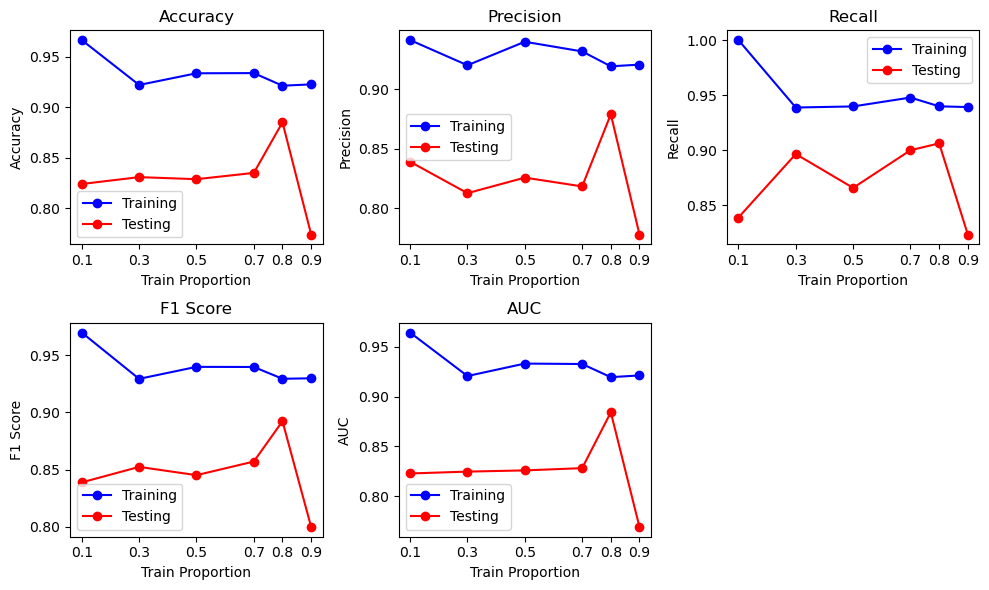

In [69]:
# Define the different train-test split ratios to iterate over
train_proportions = [0.1, 0.3, 0.5, 0.7,0.8, 0.9]

# Lists to store the performance scores for each split ratio
train_scores = []
test_scores = []

# Iterate over the train-test split ratios
for proportion in train_proportions:
    # Split the data into train and test sets with the current ratio
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-proportion, random_state=42, shuffle=True)
    X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=1-proportion, random_state=42, shuffle=True)
    
    # Separate datasets for logistic regression and other models
    X_train_logistic = X_train_d
    X_train_other = X_train
    X_test_logistic = X_test_d
    X_test_other = X_test
    
    # Define scoring metrics
    scoring_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    
    # List to store the predictions of each model
    all_predictions_train = []
    all_predictions_test = []
    
    # Fit and predict for logistic regression
    logistic_regression.fit(X_train_logistic, y_train)
    y_pred_train_logistic = logistic_regression.predict(X_train_logistic)
    y_pred_test_logistic = logistic_regression.predict(X_test_logistic)
    all_predictions_train.append(y_pred_train_logistic)
    all_predictions_test.append(y_pred_test_logistic)
    
    # Fit and predict for other models
    for model in [knn, random_forest, adaboost, naive_bayes]:
        model.fit(X_train_other, y_train)
        y_pred_train_other = model.predict(X_train_other)
        y_pred_test_other = model.predict(X_test_other)
        all_predictions_train.append(y_pred_train_other)
        all_predictions_test.append(y_pred_test_other)
    
    # Perform majority voting on the training predictions
    y_pred_majority_vote_train = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=all_predictions_train)
    y_pred_majority_vote_test = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=all_predictions_test)
    
    # Calculate evaluation metrics for the majority vote predictions on the training data
    accuracy_train = accuracy_score(y_train, y_pred_majority_vote_train)
    precision_train = precision_score(y_train, y_pred_majority_vote_train)
    recall_train = recall_score(y_train, y_pred_majority_vote_train)
    f1_train = f1_score(y_train, y_pred_majority_vote_train)
    auc_train = roc_auc_score(y_train, y_pred_majority_vote_train)
    
    # Calculate evaluation metrics for the majority vote predictions on the testing data
    accuracy_test = accuracy_score(y_test, y_pred_majority_vote_test)
    precision_test = precision_score(y_test, y_pred_majority_vote_test)
    recall_test = recall_score(y_test, y_pred_majority_vote_test)
    f1_test = f1_score(y_test, y_pred_majority_vote_test)
    auc_test = roc_auc_score(y_test, y_pred_majority_vote_test)
    
    # Print the evaluation metrics for training data
    print(f"\nTrain-Test Split Ratio: {proportion}")
    print("Training Evaluation Metrics (Majority Vote):")
    print("Accuracy:", accuracy_train)
    print("Precision:", precision_train)
    print("Recall:", recall_train)
    print("F1 Score:", f1_train)
    print("AUC:", auc_train)
    
    # Print the evaluation metrics for testing data
    print("\nTesting Evaluation Metrics (Majority Vote):")
    print("Accuracy:", accuracy_test)
    print("Precision:", precision_test)
    print("Recall:", recall_test)
    print("F1 Score:", f1_test)
    print("AUC:", auc_test)
    
    # Store the scores for the current split ratio
    train_scores.append([accuracy_train, precision_train, recall_train, f1_train, auc_train])
    test_scores.append([accuracy_test, precision_test, recall_test, f1_test, auc_test])

# Plot the training and testing performance
plt.figure(figsize=(10, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']
for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i + 1)
    plt.plot(train_proportions, [score[i] for score in train_scores], 'bo-', label='Training')
    plt.plot(train_proportions, [score[i] for score in test_scores], 'ro-', label='Testing')
    plt.title(metric)
    plt.xlabel('Train Proportion')
    plt.ylabel(metric)
    plt.legend()
    
    # Set tick locations and labels for x-axis
    plt.xticks([0.1, 0.3, 0.5, 0.7, 0.8, 0.9])
plt.tight_layout()
plt.show()


Original split of 80-20 produces best results, however, that split was used for optimization so it is hard to tell…